In [7]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため
from scipy.signal import find_peaks

# 物理定数の設定
# --- 1. 物理定数とパラメータ定義 ---
kB = 1.380649e-23; muB = 9.274010e-24; hbar = 1.054571e-34; c = 299792458
g_factor = 1.95; B_ext = 7.8; T=35.0; d = 0.1578e-3
B4_param = 0.8 / 240 * 0.606; B6_param = 0.04 / 5040 * -1.513; B4 = B4_param; B6 = B6_param
mu0 = 4.0 * np.pi * 1e-7; N_spin_exp = 24/1.238 * 1e27; N_spin = N_spin_exp * 10; s=3.5
G0 = mu0 * N_spin * (g_factor * muB)**2 / (2 * hbar)

In [8]:
# --- 一般の透過率計算 ---
def calculate_transmission(omega_array, mu_r_array, eps_bg):
    n_complex = np.sqrt(eps_bg * mu_r_array + 0j)
    impe = np.sqrt(mu_r_array / eps_bg + 0j)
    lambda_0 = np.full_like(omega_array, np.inf, dtype=float)
    nonzero_mask = omega_array != 0; lambda_0[nonzero_mask] = (2 * np.pi * c) / omega_array[nonzero_mask]
    delta = 2 * np.pi * n_complex * d / lambda_0
    numerator = 4 * impe * np.exp(1j * delta) / (1 + impe)**2
    denominator = 1 + ((impe - 1) / (impe + 1))**2 * np.exp(2j * delta)
    t = np.divide(numerator, denominator, where=denominator!=0, out=np.zeros_like(denominator, dtype=complex))
    return t

In [ ]:
# --- 2. 背景透過率の計算 ---   
def calculate_transmission_T0(omega_array, eps_bg):
        mu_r_array_0 = np.ones_like(omega_array)
        T0 = calculate_transmission(omega_array, mu_r_array_0, eps_bg)
        print("T0:", T0)
        return T0

ピークの周波数: [0.78378378 2.35135135 3.92792793 5.4954955  7.06306306 8.63063063]


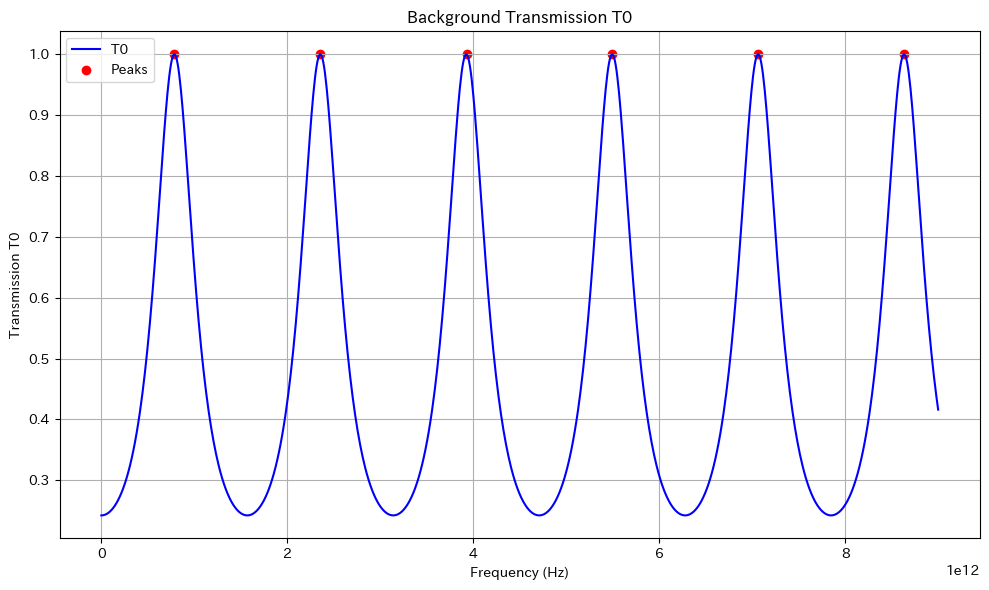

In [30]:
omega_array = np.linspace(0.1, 9.0e+12, 1000)  # 周波数範囲を設定
T0 = calculate_transmission_T0(omega_array, eps_bg=14.4573436076855250)  # 背景透過率の計算

peak_indices, _ = find_peaks(np.abs(T0)**2, prominence=0.1)  # ピークの検出
print("ピークの周波数:", omega_array[peak_indices]/1e12)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(omega_array, np.abs(T0)**2, label='T0', color='blue')
ax.scatter(omega_array[peak_indices], np.abs(T0[peak_indices]), color='red', label='Peaks')
ax.set_xlabel('Frequency (Hz)') 
ax.set_ylabel('Transmission T0')
ax.set_title('Background Transmission T0')
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()